# Parcial 2, métodos de clasificación con datos del LHC



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.svm import SVC, LinearSVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [157]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)
rc('text', usetex=False)

### Leemos el .csv y nombramos las columnas

In [158]:
df = pd.read_csv('TrainingValidationData.csv', delimiter=',', names=list(['P'+str(i) for i in range(73)]) )
print(df.columns)

Index(['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40',
       'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50',
       'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60',
       'P61', 'P62', 'P63', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70',
       'P71', 'P72'],
      dtype='object')


/tmp/ipykernel_44771/251479849.py:1: DtypeWarning: Columns (60,64,68,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TrainingValidationData.csv', delimiter=',', names=list(['P'+str(i) for i in range(73)]) )


In [159]:
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72
0,0;ttbar;0.00167779;17742.1;-2.37367;j,193103.0,143393.0,0.803969,-0.198431;j,778814.0,104707.0,2.695040,-3.03908;j,125976.0,85268.9,-0.934506,3.1025;b,69106.5,55957.8,-0.661401,0.937923;j,50482.4,39522.4,0.687292,0.839734;j,82162.7,37182.8,1.426130,-0.0749548;j,638681.0,24114.8,-3.96928,3.13769;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1;ttbar;0.00167779;15567.8;-2.90015;b,183399.0,105032.0,1.153790,-2.43549;j,166852.0,93020.5,1.186420,0.203206;j,49938.5,48836.5,0.136584,0.00672176;j,168744.0,23995.2,-2.637880,2.31197;e+,32046.3,27560.8,0.563054,1.71034;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2;ttbar;0.0334195;30647.2;2.74336;j,420301.0,135727.0,-1.792050,-0.609116;j,294268.0,78516.8,-1.994660,-2.51345;b,194433.0,67511.8,-1.716620,0.314709;j,78721.8,50067.6,1.014570,1.72546;j,60548.4,50035.6,0.620308,2.79499;b,41859.8,39719.8,-0.279838,-3.04737;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3;4top;1.93132e-07;27699.6;0.617912;j,300154.0,277869.0,-0.370231,-0.684062;j,261232.0,206121.0,0.698378,1.81692;j,258771.0,166742.0,-1.006300,-1.8801;j,145917.0,142031.0,0.159003,2.47523;j,67064.7,46427.1,-0.888082,2.22281;j,328441.0,43982.4,2.698900,0.0610803;j,62307.4,28564.1,1.39952,-2.892;m+,65374.6,53015.1,-0.670218,0.241486;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4;ttbar;0.00167779;92205.9;1.57425;j,140760.0,75721.7,-1.225510,-2.92616;j,1650250.0,68573.0,-3.873460,-0.941662;j,199485.0,39008.3,-2.314910,-2.15216;j,36111.1,32994.1,-0.399817,1.25275;j,133019.0,29239.5,-2.194640,-0.13927;m-,31258.4,27580.9,-0.510817,2.75758;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### El dataset trae en P0 6 caracteristicas más, entonces las dividimos.

In [160]:
new = df['P0'].str.split(';',expand=True)

new.columns = ['numID', 'processID', 'weight', 'MET', 'METphi', 'Type_1']

In [161]:
new.head()

,numID,processID,weight,MET,METphi,Type_1
0,0,ttbar,0.00167779,17742.1,-2.37367,j
1,1,ttbar,0.00167779,15567.8,-2.90015,b
2,2,ttbar,0.0334195,30647.2,2.74336,j
3,3,4top,1.93132e-07,27699.6,0.617912,j
4,4,ttbar,0.00167779,92205.9,1.57425,j


### Se unen al dataset principal

In [162]:
df = df.join(new, how='outer') #join them side to side

In [163]:
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,numID,processID,weight,MET,METphi,Type_1
0,0;ttbar;0.00167779;17742.1;-2.37367;j,193103.0,143393.0,0.803969,-0.198431;j,778814.0,104707.0,2.695040,-3.03908;j,125976.0,85268.9,-0.934506,3.1025;b,69106.5,55957.8,-0.661401,0.937923;j,50482.4,39522.4,0.687292,0.839734;j,82162.7,37182.8,1.426130,-0.0749548;j,638681.0,24114.8,-3.96928,3.13769;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,ttbar,0.00167779,17742.1,-2.37367,j
1,1;ttbar;0.00167779;15567.8;-2.90015;b,183399.0,105032.0,1.153790,-2.43549;j,166852.0,93020.5,1.186420,0.203206;j,49938.5,48836.5,0.136584,0.00672176;j,168744.0,23995.2,-2.637880,2.31197;e+,32046.3,27560.8,0.563054,1.71034;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ttbar,0.00167779,15567.8,-2.90015,b
2,2;ttbar;0.0334195;30647.2;2.74336;j,420301.0,135727.0,-1.792050,-0.609116;j,294268.0,78516.8,-1.994660,-2.51345;b,194433.0,67511.8,-1.716620,0.314709;j,78721.8,50067.6,1.014570,1.72546;j,60548.4,50035.6,0.620308,2.79499;b,41859.8,39719.8,-0.279838,-3.04737;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,ttbar,0.0334195,30647.2,2.74336,j
3,3;4top;1.93132e-07;27699.6;0.617912;j,300154.0,277869.0,-0.370231,-0.684062;j,261232.0,206121.0,0.698378,1.81692;j,258771.0,166742.0,-1.006300,-1.8801;j,145917.0,142031.0,0.159003,2.47523;j,67064.7,46427.1,-0.888082,2.22281;j,328441.0,43982.4,2.698900,0.0610803;j,62307.4,28564.1,1.39952,-2.892;m+,65374.6,53015.1,-0.670218,0.241486;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4top,1.93132e-07,27699.6,0.617912,j
4,4;ttbar;0.00167779;92205.9;1.57425;j,140760.0,75721.7,-1.225510,-2.92616;j,1650250.0,68573.0,-3.873460,-0.941662;j,199485.0,39008.3,-2.314910,-2.15216;j,36111.1,32994.1,-0.399817,1.25275;j,133019.0,29239.5,-2.194640,-0.13927;m-,31258.4,27580.9,-0.510817,2.75758;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,ttbar,0.00167779,92205.9,1.57425,j


### Convertimos Type_1 en 14 columnas

In [164]:
for i in range(4,53,4):

    new = df['P'+str(i)].str.split(';',expand=True) 
    
    df['P'+str(i)] = new[0]
    
    df['Type_'+str(int(i/4+1))] = new[1]
    
print(df.columns)

Index(['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40',
       'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50',
       'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60',
       'P61', 'P62', 'P63', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70',
       'P71', 'P72', 'numID', 'processID', 'weight', 'MET', 'METphi', 'Type_1',
       'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6', 'Type_7', 'Type_8',
       'Type_9', 'Type_10', 'Type_11', 'Type_12', 'Type_13', 'Type_14'],
      dtype='object')


In [165]:
df = df.drop('P0', axis=1)

In [166]:
df.columns.values

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38',
       'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47',
       'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56',
       'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'P65',
       'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'P72', 'numID',
       'processID', 'weight', 'MET', 'METphi', 'Type_1', 'Type_2',
       'Type_3', 'Type_4', 'Type_5', 'Type_6', 'Type_7', 'Type_8',
       'Type_9', 'Type_10', 'Type_11', 'Type_12', 'Type_13', 'Type_14'],
      dtype=object)

### Ordenamos

In [167]:
#just re-ordering

cols = ['numID', 'processID', 'weight',
       'MET', 'METphi', 'Type_1', 'P1', 'P2', 'P3', 'P4',  'Type_2', 'P5', 'P6', 'P7', 'P8', 'Type_3', 'P9', 'P10', 'P11',
       'P12',  'Type_4', 'P13', 'P14', 'P15', 'P16', 'Type_5','P17', 'P18', 'P19', 'P20',
       'Type_6','P21', 'P22', 'P23', 'P24', 'Type_7','P25', 'P26', 'P27', 'P28', 'Type_8','P29',
       'P30', 'P31', 'P32', 'Type_9', 'P33', 'P34', 'P35', 'P36', 'Type_10','P37', 'P38',
       'P39', 'P40', 'Type_11', 'P41', 'P42', 'P43', 'P44', 'Type_12', 'P45', 'P46', 'P47',
       'P48', 'Type_13','P49', 'P50', 'P51', 'P52']

In [168]:
X = df[cols].drop(['numID', 'processID', 'weight'], axis = 1)

In [169]:
len(cols)

70

In [170]:
X.head() 

,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,P6,P7,P8,Type_3,P9,P10,P11,P12,Type_4,P13,P14,P15,P16,Type_5,P17,P18,P19,P20,Type_6,P21,P22,P23,P24,Type_7,P25,P26,P27,P28,Type_8,P29,P30,P31,P32,Type_9,P33,P34,P35,P36,Type_10,P37,P38,P39,P40,Type_11,P41,P42,P43,P44,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
0,17742.1,-2.37367,j,193103.0,143393.0,0.803969,-0.198431,j,778814.0,104707.0,2.695040,-3.03908,j,125976.0,85268.9,-0.934506,3.1025,b,69106.5,55957.8,-0.661401,0.937923,j,50482.4,39522.4,0.687292,0.839734,j,82162.7,37182.8,1.426130,-0.0749548,j,638681.0,24114.8,-3.96928,3.13769,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15567.8,-2.90015,b,183399.0,105032.0,1.153790,-2.43549,j,166852.0,93020.5,1.186420,0.203206,j,49938.5,48836.5,0.136584,0.00672176,j,168744.0,23995.2,-2.637880,2.31197,e+,32046.3,27560.8,0.563054,1.71034,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30647.2,2.74336,j,420301.0,135727.0,-1.792050,-0.609116,j,294268.0,78516.8,-1.994660,-2.51345,b,194433.0,67511.8,-1.716620,0.314709,j,78721.8,50067.6,1.014570,1.72546,j,60548.4,50035.6,0.620308,2.79499,b,41859.8,39719.8,-0.279838,-3.04737,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27699.6,0.617912,j,300154.0,277869.0,-0.370231,-0.684062,j,261232.0,206121.0,0.698378,1.81692,j,258771.0,166742.0,-1.006300,-1.8801,j,145917.0,142031.0,0.159003,2.47523,j,67064.7,46427.1,-0.888082,2.22281,j,328441.0,43982.4,2.698900,0.0610803,j,62307.4,28564.1,1.39952,-2.892,m+,65374.6,53015.1,-0.670218,0.241486,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92205.9,1.57425,j,140760.0,75721.7,-1.225510,-2.92616,j,1650250.0,68573.0,-3.873460,-0.941662,j,199485.0,39008.3,-2.314910,-2.15216,j,36111.1,32994.1,-0.399817,1.25275,j,133019.0,29239.5,-2.194640,-0.13927,m-,31258.4,27580.9,-0.510817,2.75758,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
X.describe() 

NameError: name 'X' is not defined

Some columns that should be numerical are of type "object"

In [172]:
X.columns[X.dtypes == object]

Index(['MET', 'METphi', 'Type_1', 'P4', 'Type_2', 'P8', 'Type_3', 'P12',
       'Type_4', 'P16', 'Type_5', 'P20', 'Type_6', 'P24', 'Type_7', 'P28',
       'Type_8', 'P32', 'Type_9', 'P36', 'Type_10', 'P40', 'Type_11', 'P44',
       'Type_12', 'P48', 'Type_13', 'P52'],
      dtype='object')

### formateamos al correcto

In [173]:
for el in ['MET', 'METphi', 'P4', 'P8', 'P12',
        'P16',  'P20', 'P24',  'P28',
    'P32', 'P36', 'P40', 'P44',
      'P48', 'P52']:
    X[el] = X[el].astype('float64')

In [174]:
X.dtypes

MET        float64
METphi     float64
Type_1      object
P1         float64
P2         float64
P3         float64
P4         float64
Type_2      object
P5         float64
P6         float64
P7         float64
P8         float64
Type_3      object
P9         float64
P10        float64
P11        float64
P12        float64
Type_4      object
P13        float64
P14        float64
P15        float64
P16        float64
Type_5      object
P17        float64
P18        float64
P19        float64
P20        float64
Type_6      object
P21        float64
P22        float64
P23        float64
P24        float64
Type_7      object
P25        float64
P26        float64
P27        float64
P28        float64
Type_8      object
P29        float64
P30        float64
P31        float64
P32        float64
Type_9      object
P33        float64
P34        float64
P35        float64
P36        float64
Type_10     object
P37        float64
P38        float64
P39        float64
P40        float64
Type_11     

### Selecionamos solamente 5000 datos para que sea manipulable

In [175]:
np.random.seed(10)

sel = np.random.choice(df.shape[0], 5000)

features = X.iloc[sel,:]

In [176]:
features.shape

(5000, 67)

In [177]:
features.columns

Index(['MET', 'METphi', 'Type_1', 'P1', 'P2', 'P3', 'P4', 'Type_2', 'P5', 'P6',
       'P7', 'P8', 'Type_3', 'P9', 'P10', 'P11', 'P12', 'Type_4', 'P13', 'P14',
       'P15', 'P16', 'Type_5', 'P17', 'P18', 'P19', 'P20', 'Type_6', 'P21',
       'P22', 'P23', 'P24', 'Type_7', 'P25', 'P26', 'P27', 'P28', 'Type_8',
       'P29', 'P30', 'P31', 'P32', 'Type_9', 'P33', 'P34', 'P35', 'P36',
       'Type_10', 'P37', 'P38', 'P39', 'P40', 'Type_11', 'P41', 'P42', 'P43',
       'P44', 'Type_12', 'P45', 'P46', 'P47', 'P48', 'Type_13', 'P49', 'P50',
       'P51', 'P52'],
      dtype='object')

### reseteamos indices

In [178]:
features.reset_index(drop=True, inplace=True)

In [179]:
features.head()

,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,P6,P7,P8,Type_3,P9,P10,P11,P12,Type_4,P13,P14,P15,P16,Type_5,P17,P18,P19,P20,Type_6,P21,P22,P23,P24,Type_7,P25,P26,P27,P28,Type_8,P29,P30,P31,P32,Type_9,P33,P34,P35,P36,Type_10,P37,P38,P39,P40,Type_11,P41,P42,P43,P44,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,127932.0,0.826569,2.332000,b,86788.9,84554.9,-0.180795,2.187970,j,140289.0,76955.8,-1.19933,-1.302800,m+,85230.6,70102.4,-0.645689,-1.659540,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,68462.9,-2.126740,-2.582310,e-,44270.1,35139.6,-0.706120,-0.371392,e+,72883.9,26902.2,-1.65386,-3.129630,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,54922.3,1.226850,0.646589,j,60768.9,36244.3,1.102890,-1.434480,j,77714.0,27801.5,1.68461,1.389690,j,26840.0,24469.3,-0.388937,-1.647260,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,39472.0,-0.024646,-2.222800,j,201589.0,32978.6,-2.496040,1.137810,j,90096.7,26964.5,1.87132,0.817631,j,28235.4,25887.9,-0.411528,2.024290,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,69762.1,0.774114,2.568740,j,61625.2,50086.7,0.652572,-3.012800,j,104193.0,31151.0,1.87641,0.865381,j,746585.0,26219.3,4.041820,-0.874169,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exportamos las caracteristicas

In [180]:
features.to_csv('ParticleID_features.csv', index_label= 'ID')

#### Seleccionamos los target

In [181]:
y = df.processID[sel].values # values makes it an array

In [182]:
y

array(['ttbar', 'ttbar', 'ttbar', ..., 'ttbar', '4top', 'ttbar'],
      shape=(5000,), dtype=object)

### Los exportamos

In [183]:
np.savetxt('ParticleID_labels.txt', y, fmt = '%s')

## Ahora iniciamos

In [9]:
features = pd.read_csv('ParticleID_features.csv', index_col='ID')

In [10]:
features.head()

,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,P6,...,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
ID,,,,,,,,,,,,,,,,,,,,,
0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,127932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,68462.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,54922.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,39472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,69762.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
features.shape

(5000, 67)

In [11]:
y = np.genfromtxt('ParticleID_labels.txt', dtype = str)

In [12]:
y

array(['ttbar', 'ttbar', 'ttbar', ..., 'ttbar', '4top', 'ttbar'],
      shape=(5000,), dtype='<U5')

### convertimos el target en 0 y 1

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #turns categorical into 1 ... N

In [190]:
y

array(['ttbar', 'ttbar', 'ttbar', ..., 'ttbar', '4top', 'ttbar'],
      shape=(5000,), dtype='<U5')

In [14]:
y = le.fit_transform(y)

In [15]:
y 

array([1, 1, 1, ..., 1, 0, 1], shape=(5000,))

### invertimos los numeros por comodidad

In [16]:
target = np.abs(y - 1)

In [150]:
target

array([0, 0, 0, ..., 0, 1, 0], shape=(5000,))

In [151]:
featureS_lim.describe()

NameError: name 'featureS_lim' is not defined

### Solo consideramos las primeras 16 columnas (los primeros cuatro productos) para que tengamos problemas de imputación/manipulación limitados.

Tenemos que elegir entre mantener más características, pero tener un problema de imputación/datos faltantes más grave, o mantener menos características, pero lidiar con un problema de imputación más simple. Elegimos la segunda opción.

In [19]:
features_lim = features[['MET', 'METphi', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12',  'P13', 'P14', 'P15', 'P16']]

In [197]:
features_lim.head()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
ID,,,,,,,,,,,,,,,,,,
0,62803.5,-1.810010,137571.0,128444.0,-0.345744,-0.307112,174209.0,127932.0,0.826569,2.332000,86788.9,84554.9,-0.180795,2.187970,140289.0,76955.8,-1.19933,-1.302800
1,57594.2,-0.509253,161529.0,80458.3,-1.318010,1.402050,291490.0,68462.9,-2.126740,-2.582310,44270.1,35139.6,-0.706120,-0.371392,72883.9,26902.2,-1.65386,-3.129630
2,82313.3,1.686840,167130.0,113078.0,0.937258,-2.068680,102423.0,54922.3,1.226850,0.646589,60768.9,36244.3,1.102890,-1.434480,77714.0,27801.5,1.68461,1.389690
3,30610.8,2.617120,112267.0,61383.9,-1.211050,-1.457800,40647.8,39472.0,-0.024646,-2.222800,201589.0,32978.6,-2.496040,1.137810,90096.7,26964.5,1.87132,0.817631
4,45153.1,-2.241350,178174.0,100164.0,1.166880,-0.018721,92351.3,69762.1,0.774114,2.568740,61625.2,50086.7,0.652572,-3.012800,104193.0,31151.0,1.87641,0.865381


In [198]:
features_lim.describe() 

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4.997000e+03,4.997000e+03,4997.000000,4997.000000,4.950000e+03,4950.000000,4950.000000,4950.000000,4.717000e+03,4717.000000,4717.000000,4717.000000
mean,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.527799e+05,1.080302e+05,-0.029936,0.007327,2.117980e+05,74863.343131,-0.025104,0.011845,1.805997e+05,57289.049481,0.010723,0.045266
std,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638580e+05,8.136261e+04,1.439105,1.828832,2.510361e+05,46309.512365,1.577316,1.802715,2.383403e+05,32013.857623,1.634072,1.812078
min,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,1.087540e+04,1.080000e+04,-4.668790,-3.140530,1.221050e+04,10639.800000,-4.520250,-3.141480,1.169190e+04,10818.000000,-4.616550,-3.136130
25%,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007510e+05,6.321840e+04,-1.060500,-1.602460,7.636905e+04,46549.475000,-1.125620,-1.547418,5.999090e+04,36097.700000,-1.121240,-1.518030
50%,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.659740e+05,8.584360e+04,-0.057429,0.015111,1.288565e+05,62498.400000,-0.040648,0.034238,9.922610e+04,48949.200000,-0.035512,0.060279
75%,83032.350000,1.537323,4.077158e+05,1.771265e+05,0.943598,1.542370,2.999950e+05,1.238700e+05,1.028340,1.605210,2.421225e+05,89587.500000,1.066302,1.570887,1.914340e+05,68782.100000,1.159480,1.612220
max,692674.000000,3.141130,3.186360e+06,1.276710e+06,4.141410,3.138540,3.587700e+06,1.146330e+06,4.559150,3.139200,2.800410e+06,788338.000000,4.798090,3.139020,2.503590e+06,481884.000000,4.730480,3.139660


¡Aún quedan algunas columnas de características con longitudes diferentes! Esto significa que puede haber valores NaN. Reemplácelos por 0 por el momento.

In [20]:
features_lim = features_lim.fillna(0) #Fill with 0 everywhere there is a NaN

Nota: esta es la opción más simple pero la peor posible: imputar un valor constante distorsiona el modelo :D Un paso más sería ingresar la media o la mediana para cada columna. Sin embargo, debido a que solo una cantidad limitada de instancias tienen datos faltantes, la elección de la estrategia de imputación no importa demasiado.

In [200]:
features_lim.describe()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.526283e+05,1.079653e+05,-0.029918,0.007323,2.096800e+05,74114.709700,-0.024853,0.011727,1.703778e+05,54046.489280,0.010116,0.042704
std,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638514e+05,8.138121e+04,1.438673,1.828283,2.506651e+05,46675.655162,1.569410,1.793678,2.352279e+05,33795.723384,1.587146,1.760070
min,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,0.000000e+00,0.000000e+00,-4.668790,-3.140530,0.000000e+00,0.000000,-4.520250,-3.141480,0.000000e+00,0.000000,-4.616550,-3.136130
25%,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007050e+05,6.320943e+04,-1.059270,-1.599617,7.488228e+04,46165.375000,-1.108390,-1.532478,5.480870e+04,33959.400000,-1.050477,-1.424080
50%,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.658985e+05,8.581595e+04,-0.056810,0.012737,1.277135e+05,62167.100000,-0.023321,0.006687,9.259335e+04,47278.800000,0.000000,0.000000
75%,83032.350000,1.537323,4.077158e+05,1.771265e+05,0.943598,1.542370,2.999058e+05,1.238520e+05,1.028055,1.601880,2.406498e+05,89065.300000,1.048617,1.553310,1.831228e+05,66846.300000,1.085627,1.521765
max,692674.000000,3.141130,3.186360e+06,1.276710e+06,4.141410,3.138540,3.587700e+06,1.146330e+06,4.559150,3.139200,2.800410e+06,788338.000000,4.798090,3.139020,2.503590e+06,481884.000000,4.730480,3.139660


# Usando metodos de clasificación:

## Se prepara dataset:

In [74]:
import pandas as pd
import numpy as np

df = pd.read_csv("ParticleID_features.csv")

df_lim = df[['MET', 'METphi', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12',  'P13', 'P14', 'P15', 'P16']]

df_lim.head()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
0,62803.5,-1.810010,137571.0,128444.0,-0.345744,-0.307112,174209.0,127932.0,0.826569,2.332000,86788.9,84554.9,-0.180795,2.187970,140289.0,76955.8,-1.19933,-1.302800
1,57594.2,-0.509253,161529.0,80458.3,-1.318010,1.402050,291490.0,68462.9,-2.126740,-2.582310,44270.1,35139.6,-0.706120,-0.371392,72883.9,26902.2,-1.65386,-3.129630
2,82313.3,1.686840,167130.0,113078.0,0.937258,-2.068680,102423.0,54922.3,1.226850,0.646589,60768.9,36244.3,1.102890,-1.434480,77714.0,27801.5,1.68461,1.389690
3,30610.8,2.617120,112267.0,61383.9,-1.211050,-1.457800,40647.8,39472.0,-0.024646,-2.222800,201589.0,32978.6,-2.496040,1.137810,90096.7,26964.5,1.87132,0.817631
4,45153.1,-2.241350,178174.0,100164.0,1.166880,-0.018721,92351.3,69762.1,0.774114,2.568740,61625.2,50086.7,0.652572,-3.012800,104193.0,31151.0,1.87641,0.865381


In [20]:
df_lim.describe()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4.997000e+03,4.997000e+03,4997.000000,4997.000000,4.950000e+03,4950.000000,4950.000000,4950.000000,4.717000e+03,4717.000000,4717.000000,4717.000000
mean,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.527799e+05,1.080302e+05,-0.029936,0.007327,2.117980e+05,74863.343131,-0.025104,0.011845,1.805997e+05,57289.049481,0.010723,0.045266
std,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638580e+05,8.136261e+04,1.439105,1.828832,2.510361e+05,46309.512365,1.577316,1.802715,2.383403e+05,32013.857623,1.634072,1.812078
min,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,1.087540e+04,1.080000e+04,-4.668790,-3.140530,1.221050e+04,10639.800000,-4.520250,-3.141480,1.169190e+04,10818.000000,-4.616550,-3.136130
25%,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007510e+05,6.321840e+04,-1.060500,-1.602460,7.636905e+04,46549.475000,-1.125620,-1.547418,5.999090e+04,36097.700000,-1.121240,-1.518030
50%,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.659740e+05,8.584360e+04,-0.057429,0.015111,1.288565e+05,62498.400000,-0.040648,0.034238,9.922610e+04,48949.200000,-0.035512,0.060279
75%,83032.350000,1.537323,4.077158e+05,1.771265e+05,0.943598,1.542370,2.999950e+05,1.238700e+05,1.028340,1.605210,2.421225e+05,89587.500000,1.066302,1.570887,1.914340e+05,68782.100000,1.159480,1.612220
max,692674.000000,3.141130,3.186360e+06,1.276710e+06,4.141410,3.138540,3.587700e+06,1.146330e+06,4.559150,3.139200,2.800410e+06,788338.000000,4.798090,3.139020,2.503590e+06,481884.000000,4.730480,3.139660


In [75]:
df_lim = df_lim.fillna(0) #Fill with 0 everywhere there is a NaN
df_lim.describe()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.526283e+05,1.079653e+05,-0.029918,0.007323,2.096800e+05,74114.709700,-0.024853,0.011727,1.703778e+05,54046.489280,0.010116,0.042704
std,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638514e+05,8.138121e+04,1.438673,1.828283,2.506651e+05,46675.655162,1.569410,1.793678,2.352279e+05,33795.723384,1.587146,1.760070
min,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,0.000000e+00,0.000000e+00,-4.668790,-3.140530,0.000000e+00,0.000000,-4.520250,-3.141480,0.000000e+00,0.000000,-4.616550,-3.136130
25%,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007050e+05,6.320943e+04,-1.059270,-1.599617,7.488228e+04,46165.375000,-1.108390,-1.532478,5.480870e+04,33959.400000,-1.050477,-1.424080
50%,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.658985e+05,8.581595e+04,-0.056810,0.012737,1.277135e+05,62167.100000,-0.023321,0.006687,9.259335e+04,47278.800000,0.000000,0.000000
75%,83032.350000,1.537323,4.077158e+05,1.771265e+05,0.943598,1.542370,2.999058e+05,1.238520e+05,1.028055,1.601880,2.406498e+05,89065.300000,1.048617,1.553310,1.831228e+05,66846.300000,1.085627,1.521765
max,692674.000000,3.141130,3.186360e+06,1.276710e+06,4.141410,3.138540,3.587700e+06,1.146330e+06,4.559150,3.139200,2.800410e+06,788338.000000,4.798090,3.139020,2.503590e+06,481884.000000,4.730480,3.139660


In [76]:
y = np.genfromtxt('ParticleID_labels.txt', dtype = str)

y


array(['ttbar', 'ttbar', 'ttbar', ..., 'ttbar', '4top', 'ttbar'],
      shape=(5000,), dtype='<U5')

### Volvemos los target como valores numéricos.

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #turns categorical into 1 ... N

y = le.fit_transform(y)

target = np.abs(y - 1)

target

array([0, 0, 0, ..., 0, 1, 0], shape=(5000,))

### Competimos contra una clasificacion donde todo dato que llegue lo clasificamos como 4top, de una precisión de 0.8378

In [78]:
np.sum(target)/len(target) #distribution 

np.float64(0.1622)

## SVM:

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics


df_svm = df_lim



X_train, X_test, y_train, y_test = train_test_split(df_svm, target, test_size=0.2, random_state=42)


X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)       


modelo_svm = SVC(kernel='rbf', C=1.0)  
modelo_svm.fit(X_train, y_train)


y_pred = modelo_svm.predict(X_test)


print("Exactitud:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("Matriz de confusión:\n", metrics.confusion_matrix(y_test, y_pred))

Exactitud: 0.901
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       865
           1       0.65      0.57      0.61       135

    accuracy                           0.90      1000
   macro avg       0.79      0.76      0.78      1000
weighted avg       0.90      0.90      0.90      1000

Matriz de confusión:
 [[824  41]
 [ 58  77]]


In [154]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

piped_model = make_pipeline(StandardScaler(), SVC()) 

piped_model.get_params() 

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [155]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


parameters = {'svc__kernel':['poly', 'rbf'], \
              'svc__gamma':[0.00001,'scale', 0.01, 0.1], 'svc__C':[0.1, 1.0, 10.0, 100.0, 1000], \
              'svc__degree': [2, 4, 8]}

model = GridSearchCV(piped_model, parameters, cv = StratifiedKFold(n_splits=5, shuffle=True), \
                     verbose = 2, n_jobs = 4, return_train_score=True)

model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=1e-05, svc__kernel=poly; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=1e-05, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=scale, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=0.01, svc__kernel=poly; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=0.01, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=0.01, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=0.1, svc__kernel=poly; total time=   0.1s
[CV] END svc__C=0.1, svc__degree=2, svc__gamma=0.1, svc__kernel=rbf; total time=   0.2s
[CV] END svc__C=0.1, svc__degree=4, svc

## Tree Desicion:

Exactitud: 0.893
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       865
           1       0.59      0.70      0.64       135

    accuracy                           0.89      1000
   macro avg       0.77      0.81      0.79      1000
weighted avg       0.90      0.89      0.90      1000

Matriz de confusión:
 [[799  66]
 [ 41  94]]


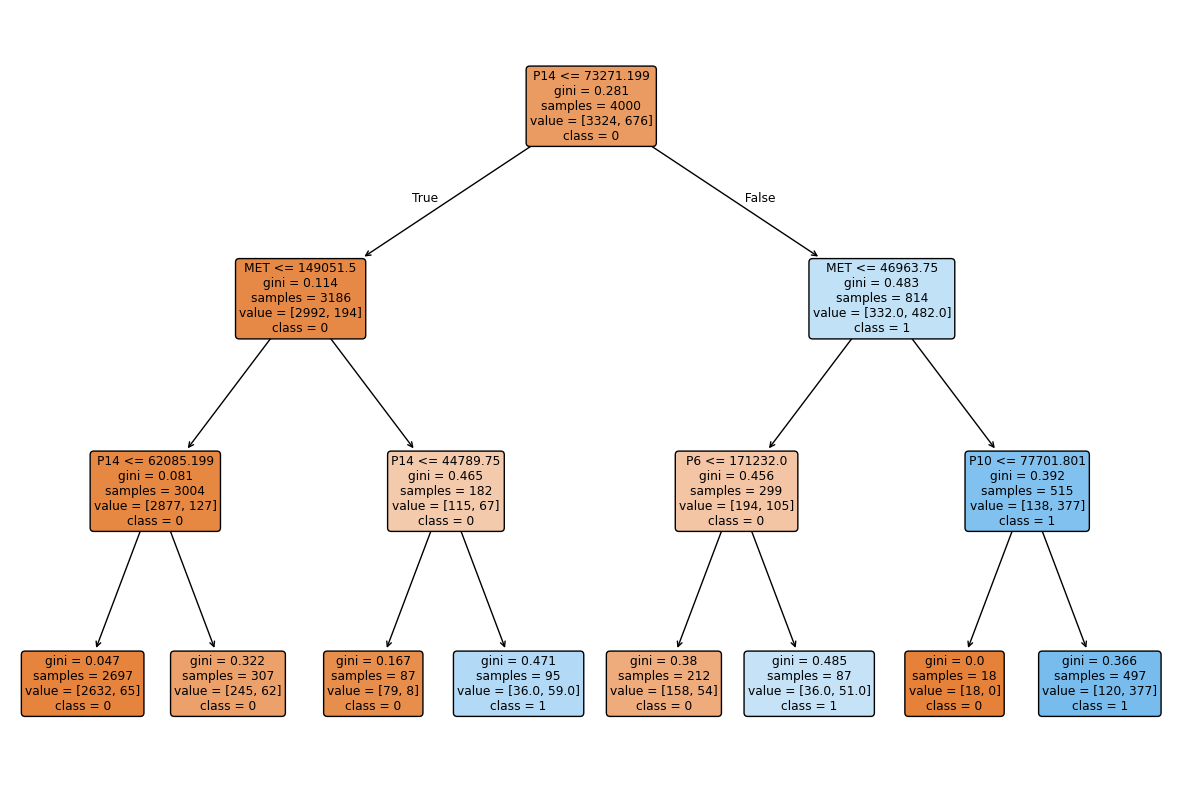

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt


df_tree = df_lim


X_train, X_test, y_train, y_test = train_test_split(df_tree, target, test_size=0.2, random_state=42)


modelo_tree = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=3,     
    min_samples_split=10
)
modelo_tree.fit(X_train, y_train)


y_pred = modelo_tree.predict(X_test)


print("Exactitud:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("Matriz de confusión:\n", metrics.confusion_matrix(y_test, y_pred))


plt.figure(figsize=(15,10))
plot_tree(
    modelo_tree,
    feature_names=df_tree.columns[:18].tolist(), 
    class_names=[str(clase) for clase in modelo_tree.classes_], 
    filled=True,
    rounded=True
)
plt.show()

### Conocer la importancia de las caracteristicas:

In [94]:
importancias = modelo_tree.feature_importances_
for i, importancia in enumerate(importancias):
    print(f"Característica {i+1}: {importancia:.4f}")

Característica 1: 0.1711
Característica 2: 0.0000
Característica 3: 0.0000
Característica 4: 0.0000
Característica 5: 0.0000
Característica 6: 0.0000
Característica 7: 0.0000
Característica 8: 0.0254
Característica 9: 0.0000
Característica 10: 0.0000
Característica 11: 0.0000
Característica 12: 0.0375
Característica 13: 0.0000
Característica 14: 0.0000
Característica 15: 0.0000
Característica 16: 0.7660
Característica 17: 0.0000
Característica 18: 0.0000


### buscando los mejores hiperparametros

In [152]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


param_dist = { 
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}


random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)


print("=== Mejores hiperparámetros (Randomized) ===")
print(random_search.best_params_)
print("Precisión (CV):", random_search.best_score_)


param_grid_refined = {
    'max_depth': [3, 4, 5],  
    'min_samples_split': [8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [8, 10, 12]  
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid_refined,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)


print("\n=== Mejores hiperparámetros (Grid) ===")
print(grid.best_params_)
print("Precisión (CV):", grid.best_score_)


mejor_modelo = grid.best_estimator_  
y_pred = mejor_modelo.predict(X_test)
print("\nExactitud en prueba:", metrics.accuracy_score(y_test, y_pred))

=== Mejores hiperparámetros (Randomized) ===
{'min_samples_split': 50, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 'class_weight': None}
Precisión (CV): 0.8945024861912629

=== Mejores hiperparámetros (Grid) ===
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 8}
Precisión (CV): 0.8947499999999999

Exactitud en prueba: 0.893


### Eliminemos las caracteristicas con menor peso

In [96]:
df_tree

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
0,62803.5,-1.810010,137571.0,128444.0,-0.345744,-0.307112,174209.0,127932.0,0.826569,2.332000,86788.9,84554.9,-0.180795,2.187970,140289.0,76955.8,-1.199330,-1.302800
1,57594.2,-0.509253,161529.0,80458.3,-1.318010,1.402050,291490.0,68462.9,-2.126740,-2.582310,44270.1,35139.6,-0.706120,-0.371392,72883.9,26902.2,-1.653860,-3.129630
2,82313.3,1.686840,167130.0,113078.0,0.937258,-2.068680,102423.0,54922.3,1.226850,0.646589,60768.9,36244.3,1.102890,-1.434480,77714.0,27801.5,1.684610,1.389690
3,30610.8,2.617120,112267.0,61383.9,-1.211050,-1.457800,40647.8,39472.0,-0.024646,-2.222800,201589.0,32978.6,-2.496040,1.137810,90096.7,26964.5,1.871320,0.817631
4,45153.1,-2.241350,178174.0,100164.0,1.166880,-0.018721,92351.3,69762.1,0.774114,2.568740,61625.2,50086.7,0.652572,-3.012800,104193.0,31151.0,1.876410,0.865381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,269074.0,-1.274730,495577.0,362590.0,-0.791914,1.671250,328278.0,224827.0,0.922952,-1.284970,2628790.0,178652.0,-3.380790,2.922260,303713.0,156021.0,-1.284190,0.436475
4996,12385.8,0.986871,258932.0,133559.0,-1.276540,2.970100,87822.2,73895.0,0.604704,-0.646550,104199.0,67035.4,-1.003020,-0.909438,60343.9,38512.4,-1.013560,0.770876
4997,32762.8,3.057630,122222.0,79947.8,0.983920,-0.399231,260623.0,49940.6,2.334630,0.555659,56696.1,49853.1,0.422515,-3.014610,36338.9,25777.1,0.850436,0.672009
4998,104474.0,-1.875250,791028.0,457589.0,1.141530,2.934810,304661.0,224326.0,0.793147,0.407167,569714.0,151015.0,2.002460,-0.778558,83117.9,79371.7,-0.234668,-0.225965


In [97]:
features_relevantes = [0, 7, 11, 15] 
df_tree = df_tree.iloc[:, features_relevantes]
df_tree

,MET,P6,P10,P14
0,62803.5,127932.0,84554.9,76955.8
1,57594.2,68462.9,35139.6,26902.2
2,82313.3,54922.3,36244.3,27801.5
3,30610.8,39472.0,32978.6,26964.5
4,45153.1,69762.1,50086.7,31151.0
...,...,...,...,...
4995,269074.0,224827.0,178652.0,156021.0
4996,12385.8,73895.0,67035.4,38512.4
4997,32762.8,49940.6,49853.1,25777.1
4998,104474.0,224326.0,151015.0,79371.7


In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_tree, target, test_size=0.2, random_state=42)

param_dist = {  
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}


random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)


print("=== Mejores hiperparámetros (Randomized) ===")
print(random_search.best_params_)
print("Precisión (CV):", random_search.best_score_)


param_grid_refined = {
    'max_depth': [random_search.best_params_['max_depth'] - 2, 
                  random_search.best_params_['max_depth'], 
                  random_search.best_params_['max_depth'] + 2],
    'min_samples_split': [random_search.best_params_['min_samples_split'] // 2,
                          random_search.best_params_['min_samples_split'],
                          random_search.best_params_['min_samples_split'] * 2],
    
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid_refined,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)


print("\n=== Mejores hiperparámetros (Grid) ===")
print(grid.best_params_)
print("Precisión (CV):", grid.best_score_)


mejor_modelo = grid.best_estimator_  
y_pred = mejor_modelo.predict(X_test)
print("\nExactitud en prueba:", metrics.accuracy_score(y_test, y_pred))

=== Mejores hiperparámetros (Randomized) ===
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'class_weight': None}
Precisión (CV): 0.8969987999248689

=== Mejores hiperparámetros (Grid) ===
{'max_depth': 5, 'min_samples_split': 5}
Precisión (CV): 0.8965

Exactitud en prueba: 0.879


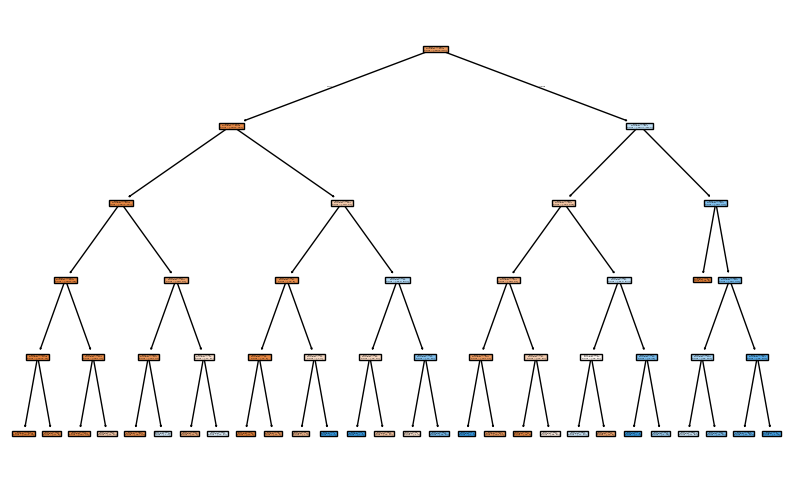

In [100]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(mejor_modelo, feature_names=df_tree.columns.tolist(), filled=True)
plt.show()

## Logistic Regresion:

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


df_log = df_lim

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Crear y entrenar el modelo
modelo_lr = LogisticRegression(
    penalty='l2',         
    C=1.0,                
    solver='liblinear',   
    max_iter=1000         
)
modelo_lr.fit(X_train, y_train)


y_pred = modelo_lr.predict(X_test)


print("Exactitud:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("Matriz de confusión:\n", metrics.confusion_matrix(y_test, y_pred))


coeficientes = pd.DataFrame({
    'Característica': df_log.columns[:18],
    'Coeficiente': modelo_lr.coef_[0]
})
print("\nCoeficientes:\n", coeficientes.sort_values(by='Coeficiente', ascending=False))

Exactitud: 0.898
              precision    recall  f1-score   support

           0       0.64      0.56      0.60       135
           1       0.93      0.95      0.94       865

    accuracy                           0.90      1000
   macro avg       0.79      0.76      0.77      1000
weighted avg       0.89      0.90      0.90      1000

Matriz de confusión:
 [[ 76  59]
 [ 43 822]]

Coeficientes:
    Característica  Coeficiente
2              P1     0.224205
4              P3     0.084325
14            P13     0.070960
1          METphi     0.038489
6              P5     0.024530
16            P15     0.022411
10             P9    -0.020548
13            P12    -0.026515
12            P11    -0.044517
8              P7    -0.064016
17            P16    -0.071392
9              P8    -0.084865
11            P10    -0.099457
5              P4    -0.155707
3              P2    -0.235380
7              P6    -0.377697
0             MET    -0.676548
15            P14    -1.546044


In [108]:
modelo_lr = LogisticRegression(
    penalty='l2',       
    C=1.0,              
    solver='liblinear', 
    max_iter=1000,
    class_weight={0: 5, 1: 1}
)
modelo_lr.fit(X_train, y_train)


y_pred = modelo_lr.predict(X_test)


print("Exactitud:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("Matriz de confusión:\n", metrics.confusion_matrix(y_test, y_pred))


coeficientes = pd.DataFrame({
    'Característica': df_log.columns[:18],
    'Coeficiente': modelo_lr.coef_[0]
})
print("\nCoeficientes:\n", coeficientes.sort_values(by='Coeficiente', ascending=False))

Exactitud: 0.853
              precision    recall  f1-score   support

           0       0.48      0.87      0.61       135
           1       0.98      0.85      0.91       865

    accuracy                           0.85      1000
   macro avg       0.73      0.86      0.76      1000
weighted avg       0.91      0.85      0.87      1000

Matriz de confusión:
 [[117  18]
 [129 736]]

Coeficientes:
    Característica  Coeficiente
2              P1     0.165905
14            P13     0.132534
4              P3     0.089759
6              P5     0.026847
1          METphi     0.012713
16            P15     0.005525
13            P12    -0.011888
10             P9    -0.037990
12            P11    -0.045474
8              P7    -0.056712
17            P16    -0.059735
9              P8    -0.098430
11            P10    -0.143468
5              P4    -0.153555
3              P2    -0.234016
7              P6    -0.431375
0             MET    -0.815293
15            P14    -1.948932


### probando diferentes hiperparametros

In [126]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2','l1'],
    'class_weight': [None, {0: 3, 1: 1}, 'balanced'],
    'solver': ['saga', 'liblinear'],
    'max_iter': [1000, 500, 10000, 100000]
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')


grid.fit(X_train, y_train)


print("\n=== Mejores hiperparámetros (Grid) ===")
print(grid.best_params_)
print("Precisión (CV):", grid.best_score_)


mejor_modelo = grid.best_estimator_  
y_pred = mejor_modelo.predict(X_test)
print("\nExactitud en prueba:", metrics.accuracy_score(y_test, y_pred))


=== Mejores hiperparámetros (Grid) ===
{'C': 1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Precisión (CV): 0.9380421992513892

Exactitud en prueba: 0.898


In [123]:
modelo_lr = LogisticRegression(
    penalty='l2',         
    C=1.0,           
    solver='saga',   
    max_iter=1000,
    class_weight=None
)
modelo_lr.fit(X_train, y_train)


y_pred = modelo_lr.predict(X_test)

# Metricas
print("Exactitud:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("Matriz de confusión:\n", metrics.confusion_matrix(y_test, y_pred))


coeficientes = pd.DataFrame({
    'Característica': df_log.columns[:18],
    'Coeficiente': modelo_lr.coef_[0]
})
print("\nCoeficientes:\n", coeficientes.sort_values(by='Coeficiente', ascending=False))

Exactitud: 0.898
              precision    recall  f1-score   support

           0       0.64      0.56      0.60       135
           1       0.93      0.95      0.94       865

    accuracy                           0.90      1000
   macro avg       0.79      0.76      0.77      1000
weighted avg       0.89      0.90      0.90      1000

Matriz de confusión:
 [[ 76  59]
 [ 43 822]]

Coeficientes:
    Característica  Coeficiente
2              P1     0.225079
4              P3     0.084783
14            P13     0.071287
1          METphi     0.038648
6              P5     0.024529
16            P15     0.022693
10             P9    -0.020649
13            P12    -0.026743
12            P11    -0.044806
8              P7    -0.064280
17            P16    -0.071606
9              P8    -0.085332
11            P10    -0.099701
5              P4    -0.156632
3              P2    -0.236689
7              P6    -0.377644
0             MET    -0.678693
15            P14    -1.552376


### eliminando caracteristicas

In [127]:
features_relevantes = [0, 7, 11, 15, 3,5,2] 
df_log = df_log.iloc[:, features_relevantes]
df_log

,MET,P6,P10,P14,P2,P4,P1
0,62803.5,127932.0,84554.9,76955.8,128444.0,-0.307112,137571.0
1,57594.2,68462.9,35139.6,26902.2,80458.3,1.402050,161529.0
2,82313.3,54922.3,36244.3,27801.5,113078.0,-2.068680,167130.0
3,30610.8,39472.0,32978.6,26964.5,61383.9,-1.457800,112267.0
4,45153.1,69762.1,50086.7,31151.0,100164.0,-0.018721,178174.0
...,...,...,...,...,...,...,...
4995,269074.0,224827.0,178652.0,156021.0,362590.0,1.671250,495577.0
4996,12385.8,73895.0,67035.4,38512.4,133559.0,2.970100,258932.0
4997,32762.8,49940.6,49853.1,25777.1,79947.8,-0.399231,122222.0
4998,104474.0,224326.0,151015.0,79371.7,457589.0,2.934810,791028.0


In [128]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [129]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2','l1'],
    'class_weight': [None, {0: 3, 1: 1}, 'balanced'],
    'solver': ['saga', 'liblinear'],
    'max_iter': [1000, 500, 10000, 100000]
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')


grid.fit(X_train, y_train)


print("\n=== Mejores hiperparámetros (Grid) ===")
print(grid.best_params_)
print("Precisión (CV):", grid.best_score_)


mejor_modelo = grid.best_estimator_  
y_pred = mejor_modelo.predict(X_test)
print("\nExactitud en prueba:", metrics.accuracy_score(y_test, y_pred))


=== Mejores hiperparámetros (Grid) ===
{'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión (CV): 0.9390231656701282

Exactitud en prueba: 0.896


## KNN: 

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

df_knn = df_lim


X_train, X_test, y_train, y_test = train_test_split(
    df_knn, 
    target, 
    test_size=0.2, 
    stratify=target, 
    random_state=42
)

# pipeline (escalado + modelo)
knn_model = make_pipeline(
    StandardScaler(),  
    KNeighborsClassifier(n_neighbors=5)  
)


knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


print("=== KNN ===")
print(f"Exactitud: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

=== KNN ===
Exactitud: 0.8800
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       838
           1       0.69      0.48      0.56       162

    accuracy                           0.88      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.87      0.88      0.87      1000



In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10] 
}

grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor exactitud (CV):", grid.best_score_)

Mejores parámetros: {'kneighborsclassifier__n_neighbors': 10}
Mejor exactitud (CV): 0.8852499999999999


## Bayes:

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  

df_bayes = df_lim


X_train, X_test, y_train, y_test = train_test_split(
    df_bayes, 
    target, 
    test_size=0.2, 
    stratify=target, 
    random_state=42
)

# Pipeline (escalado opcional + modelo)
nb_model = make_pipeline(
    StandardScaler(), 
    GaussianNB()      
)


nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


print("=== Naive Bayes ===")
print(f"Exactitud: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

=== Naive Bayes ===
Exactitud: 0.8820
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       838
           1       0.66      0.56      0.61       162

    accuracy                           0.88      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.88      0.88      0.88      1000



In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'gaussiannb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6] 
}

grid = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejor parámetro:", grid.best_params_)
print("Mejor exactitud (CV):", grid.best_score_)

Mejor parámetro: {'gaussiannb__var_smoothing': 1e-09}
Mejor exactitud (CV): 0.86725


## Ensambles:

=== Random Forest ===
Exactitud: 0.871
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       838
           1       0.57      0.83      0.68       162

    accuracy                           0.87      1000
   macro avg       0.77      0.86      0.80      1000
weighted avg       0.90      0.87      0.88      1000

Matriz de confusión:
 [[736 102]
 [ 27 135]]


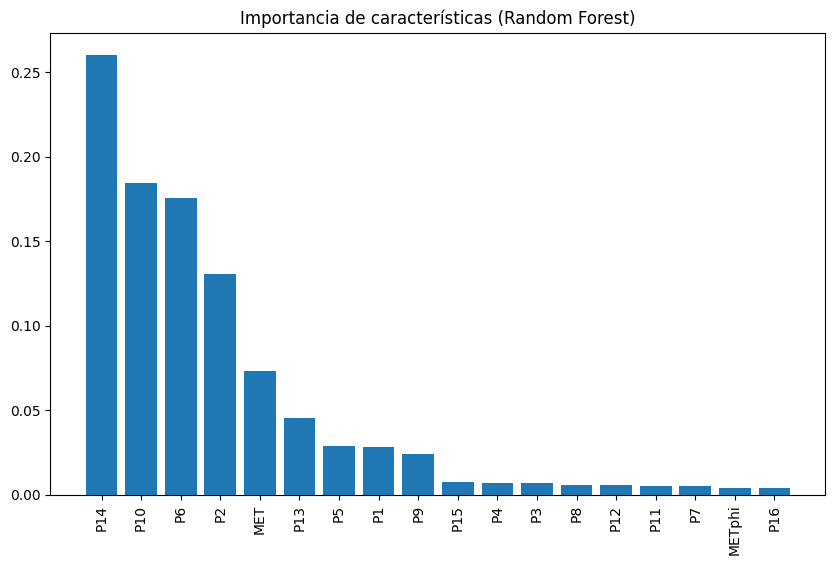


=== Gradient Boosting ===
Exactitud: 0.902
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       838
           1       0.73      0.64      0.68       162

    accuracy                           0.90      1000
   macro avg       0.83      0.79      0.81      1000
weighted avg       0.90      0.90      0.90      1000

Matriz de confusión:
 [[799  39]
 [ 59 103]]

Validación cruzada RF (5 folds):
Promedio: 0.8652 ± 0.011391224692718525


In [146]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df_ens = df_lim


X_train, X_test, y_train, y_test = train_test_split(
    df_ens, 
    target, 
    test_size=0.2, 
    stratify=target,  
    random_state=42
)

# 3. Modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

# Importancia de características (RF)
importancias = rf_model.feature_importances_
indices = np.argsort(importancias)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Importancia de características (Random Forest)")
plt.bar(range(X_train.shape[1]), importancias[indices], align="center")
plt.xticks(range(X_train.shape[1]), df_ens.columns[indices], rotation=90)
plt.show()

# 4. Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\n=== Gradient Boosting ===")
print("Exactitud:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_gb))

# Validación cruzada (opcional)
print("\nValidación cruzada RF (5 folds):")
scores = cross_val_score(rf_model, df_ens, target, cv=5, scoring='accuracy')
print("Promedio:", scores.mean(), "±", scores.std())

[CV] END svc__C=100.0, svc__degree=2, svc__gamma=1e-05, svc__kernel=poly; total time=   0.1s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=1e-05, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=1e-05, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   3.6s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=scale, svc__kernel=rbf; total time=   0.3s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=0.01, svc__kernel=poly; total time=   0.2s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=0.01, svc__kernel=poly; total time=   0.2s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=0.01, svc__kernel=rbf; total time=   0.2s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=0.01, svc__kernel=rbf; total time=   0.3s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=0.1, svc__kernel=poly; total time=  12.7s
[CV] END svc__C=100.0, svc__degree=2, svc__gamma=0.1, svc__kernel=rbf; total time

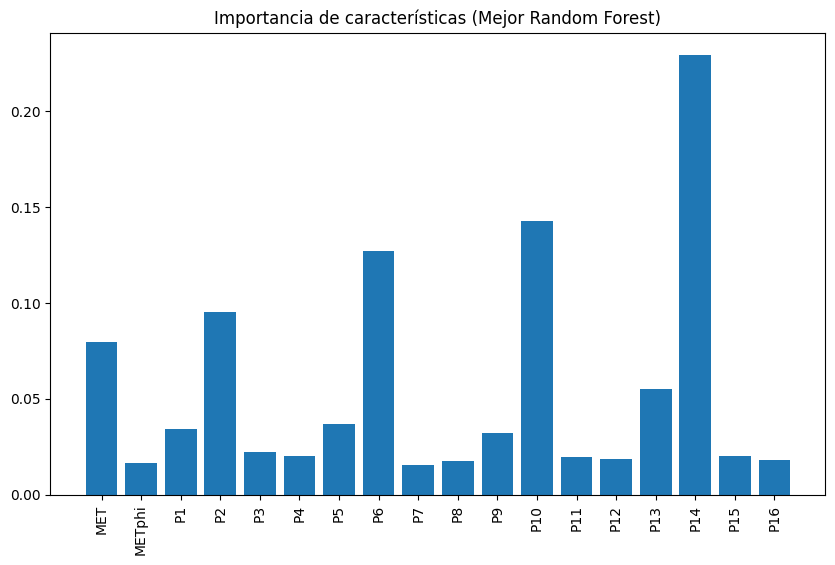

In [156]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt


df_ens = df_lim


X_train, X_test, y_train, y_test = train_test_split(
    df_ens, 
    target, 
    test_size=0.2, 
    stratify=target,  
    random_state=42
)

# 2. Manejo de desbalance: Calcular pesos para Gradient Boosting
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


rf_initial = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_initial.fit(X_train, y_train)

# Obtener características relevantes (umbral > 0.01)
importancias = rf_initial.feature_importances_
umbral = 0.01  # Ajusta según tus resultados
seleccion = importancias > umbral
X_train_sel = X_train.loc[:, seleccion]
X_test_sel = X_test.loc[:, seleccion]

# 4. Optimización de hiperparámetros con GridSearchCV
# ==============================================================================
# Random Forest
# ==============================================================================
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train_sel, y_train)

# Mejor modelo RF
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_sel)

# ==============================================================================
# Gradient Boosting
# ==============================================================================
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_gb.fit(X_train_sel, y_train, sample_weight=sample_weights)

# Mejor modelo GB
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_sel)

# 5. Evaluación de resultados
# ==============================================================================
# Resultados Random Forest
print("=== Mejor Random Forest ===")
print("Parámetros:", grid_rf.best_params_)
print("Exactitud (test):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

# Resultados Gradient Boosting
print("\n=== Mejor Gradient Boosting ===")
print("Parámetros:", grid_gb.best_params_)
print("Exactitud (test):", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_gb))

# 6. Importancia de características (post-selección)
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_sel.shape[1]), best_rf.feature_importances_, align="center")
plt.xticks(range(X_train_sel.shape[1]), X_train_sel.columns, rotation=90)
plt.title("Importancia de características (Mejor Random Forest)")
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
=== Mejor Random Forest ===
Parámetros: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Exactitud: 0.895
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       838
           1       0.66      0.73      0.69       162

    accuracy                           0.90      1000
   macro avg       0.80      0.83      0.81      1000
weighted avg       0.90      0.90      0.90      1000

Matriz de confusión:
 [[777  61]
 [ 44 118]]

=== Mejor Gradient Boosting ===
Parámetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Exactitud: 0.873
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       838
           1       0.57      0.83      0.68       162

    accuracy                           0.87      100

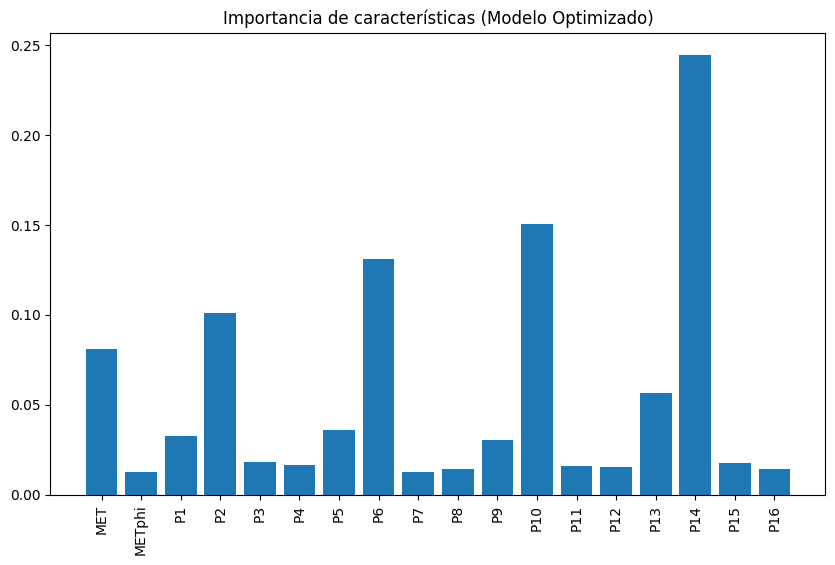

In [158]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight


df_ens = df_lim

X_train, X_test, y_train, y_test = train_test_split(
    df_ens, 
    target, 
    test_size=0.2, 
    stratify=target,  
    random_state=42
)

# 2. Calcular pesos para Gradient Boosting (manejo de desbalance)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 3. Selección de características (eliminar <1% importancia)
# Entrenar modelo inicial para obtener importancias
rf_initial = RandomForestClassifier(
    class_weight='balanced', 
    random_state=42
).fit(X_train, y_train)

umbral = 0.01  # Ajustar según necesidad
seleccion = rf_initial.feature_importances_ > umbral
X_train_sel = X_train.loc[:, seleccion]
X_test_sel = X_test.loc[:, seleccion]

# 4. Optimización con foco en recall de clase 1
# ==============================================================================
# Random Forest (énfasis en clase minoritaria)
# ==============================================================================
param_grid_rf = {
    'n_estimators': [200, 300],         
    'max_depth': [10, None],          
    'min_samples_split': [5, 10],     
    'class_weight': [{0:1, 1:5}, 'balanced'] 
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',  # Priorizar recall clase 1
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train_sel, y_train)

# ==============================================================================
# Gradient Boosting (ponderación manual)
# ==============================================================================
param_grid_gb = {
    'n_estimators': [200, 300],      
    'learning_rate': [0.1, 0.05],    
    'max_depth': [3, 5],             
    'subsample': [0.8, 1.0]          
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid_gb.fit(X_train_sel, y_train, sample_weight=sample_weights)  # Ponderación

# 5. Evaluación final
# ==============================================================================
# Mejor Random Forest
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_sel)

print("=== Mejor Random Forest ===")
print(f"Parámetros: {grid_rf.best_params_}")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

# Mejor Gradient Boosting
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_sel)

print("\n=== Mejor Gradient Boosting ===")
print(f"Parámetros: {grid_gb.best_params_}")
print("Exactitud:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_gb))

# 6. Importancia de características (post optimización)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train_sel.shape[1]), best_rf.feature_importances_, align="center")
plt.xticks(range(X_train_sel.shape[1]), X_train_sel.columns, rotation=90)
plt.title("Importancia de características (Modelo Optimizado)")
plt.show()